In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numpy.linalg import norm
import seaborn as sns
sns.set()


NameError: name 'jac_norms' is not defined

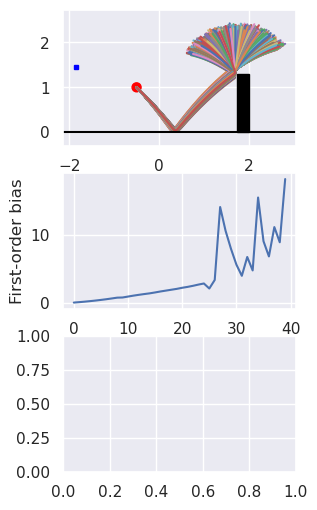

In [136]:
# Correlation between stiffness and bias/variance
def norm_variance(arr: np.ndarray):
    assert len(arr.shape) == 3, arr.shape
    return np.mean(
        norm(arr - np.mean(arr, axis=1, keepdims=True), ord=2, axis=-1) ** 2,
        axis=1,
    )

data = np.load("outputs/bounce_grads_40.npz")
fobgs = data["fobgs"]
zobgs = data["zobgs"]
loss = data["losses"]
baseline = data["baseline"]
hh = np.arange(fobgs.shape[0])
m=data['m']
N = fobgs.shape[1]
std = data['std']
H = 40

f, ax = plt.subplots(3, 1, figsize=(3, 6))

ldata = np.load("outputs/landscapes_0.1.npy", allow_pickle=True)
xy = ldata[0]['trajectories'][0]

for n in range(xy.shape[1]):
    ax[0].plot(xy[:, n, 0], xy[:, n, 1])

# add wall
rect = patches.Rectangle((1.75, 0), 0.25, 1.3, linewidth=1, edgecolor='black', facecolor='black')
ax[0].add_patch(rect)

# add target
rect = patches.Rectangle((-1.9, 1.4), 0.1, 0.1, linewidth=1, edgecolor='blue', facecolor='blue')
ax[0].add_patch(rect)
ax[0].add_patch(patches.Circle((-0.5, 1.0), 0.1, edgecolor='red', facecolor='red'))
ax[0].axhline(0, c='black')

ax[0].axis('equal')
# ax[0].set_xticks([])
# ax[0].set_yticks([])

diff = zobgs.mean(axis=1) - fobgs.mean(axis=1)
bias_l2 = norm(diff, ord=2, axis=-1)
bias_l1 = norm(diff, ord=1, axis=-1)
ax[1].plot(hh, bias_l2, label="L2 Bias")
# ax[0, 0].plot(hh, bias_l1, label="L1 Bias")
# for (start, end) in contact_ranges:
#     ax[1].axvspan(start/8, end/8, alpha=0.2, color='red')
ax[1].set_ylabel("First-order bias")
# ax[0, 0].legend()
ax[1].set_xlabel("H")
# ax[0, 0].set_yscale("log")

# ax[0, 1].plot(hh, norm_variance(zobgs), label="ZoBGs")
# ax[0, 1].plot(hh, norm_variance(fobgs), label="FoBGs")
# ax[0, 1].plot(hh, hh**3 * m / (N * std**2), label="Lemma 3.10")
# for (start, end) in contact_ranges:
#     ax[0, 1].axvspan(start/8, end/8, alpha=0.2, color='red')
# ax[0, 1].set_yscale("log")
# ax[0, 1].set_xlabel("H")
# ax[0, 1].set_title("Gradient variance")
# ax[0, 1].legend()


ax[2].plot(np.arange(H)/8, jac_norms)
ax[2].set_ylabel(r"$||\nabla f ||$")
ax[2].set_xlabel("H")

# for n in range(xy.shape[1]):
#     ax[1,1].plot(xy[:, n, 0], xy[:, n, 1])

# # add wall
# rect = patches.Rectangle((1.75, 0), 0.25, 1.0, linewidth=1, edgecolor='black', facecolor='black')
# ax[1,1].add_patch(rect)

# # add target
# rect = patches.Rectangle((-1.9, 1.4), 0.1, 0.1, linewidth=1, edgecolor='blue', facecolor='blue')
# ax[1,1].add_patch(rect)

# ax[1,1].axis('equal')
# ax[1,1].set_xlim((-3, 3))


plt.tight_layout()
plt.savefig("outputs/ball_bias_and_stiffness.pdf")

In [137]:
list(data.keys())

['h', 'zobgs', 'fobgs', 'losses', 'baseline', 'std', 'n', 'm']

## Takeways:
- different type of contact have different stiffness and thus bias

# Exploring how different contact approximation affects jacobians


<IPython.core.display.Javascript object>


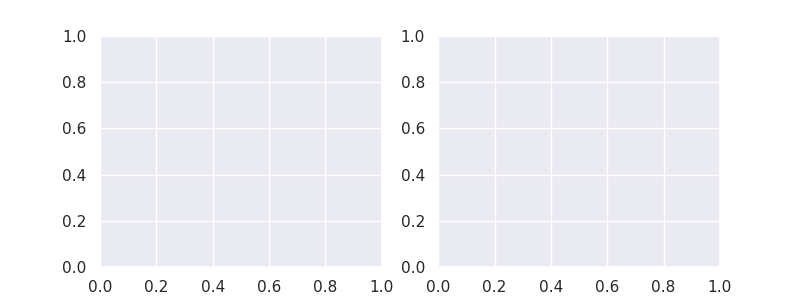

KeyError: '0 is not a file in the archive'

In [19]:
%matplotlib notebook

data = np.load("outputs/jacobians.npz", allow_pickle=True)

f, ax = plt.subplots(1, 2, figsize=(8, 3))
max_jac_norm = []

for i in range(len(data)):
    print(f"{i} ke:{data[i]['soft_contact_ke']} kf:{data[i]['soft_contact_kf']}  kd:{data[i]['soft_contact_kd']}  mu:{data[i]['soft_contact_mu']}  margin:{data[i]['soft_contact_margin']} ")
    xyz = data[i]['trajectories'].mean(axis=1)
    ax[0].plot(xyz[:, 0], xyz[:, 1], label=i)
    
    jacs = data[i]["jacobians"]
    jac_norms = norm(jacs, axis=(2,3)).mean(axis=1)
    ax[1].plot(np.arange(len(jacs))/8, jac_norms)
    max_jac_norm.append(np.max(jac_norms))
    
ax[0].legend()
    
# add wall
ax[0].add_patch(patches.Rectangle((1.75, 0), 0.25, 2.0, linewidth=1, edgecolor='black', facecolor='black'))

# add target
ax[0].add_patch(patches.Rectangle((-1.9, 1.4), 0.1, 0.1, linewidth=1, edgecolor='blue', facecolor='blue'))

# ball
ax[0].add_patch(patches.Circle((-0.5, 1.0), 0.1, edgecolor='red', facecolor='red'))

ax[0].axis("equal")

0 ke:10000.0 kf:1.0  kd:10.0  mu:0.9  margin:10.0 
1 ke:30000.0 kf:3.0  kd:30.0  mu:0.9  margin:10.0 
2 ke:50000.0 kf:5.0  kd:50.0  mu:0.9  margin:10.0 
3 ke:100000.0 kf:10.0  kd:100.0  mu:0.9  margin:10.0 


ValueError: x and y must have same first dimension, but have shapes (0,) and (4,)

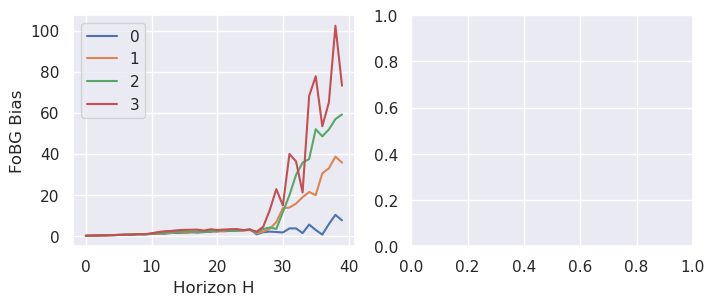

In [81]:
# what does this mean for bias?

data = np.load("outputs/bounce_grads_40_sim_sweep.npy", allow_pickle=True)
data = data[[0, 2, 3, 5]]
f, ax = plt.subplots(1, 2, figsize=(8, 3))
H = 40
bias = []
stiffness = []

for i in range(len(data)):
    print(f"{i} ke:{data[i]['soft_contact_ke']} kf:{data[i]['soft_contact_kf']}  kd:{data[i]['soft_contact_kd']}  mu:{data[i]['soft_contact_mu']}  margin:{data[i]['soft_contact_margin']} ")
    fobgs = data[i]["fobgs"]
    zobgs = data[i]["zobgs"]
    loss = data[i]["losses"]
    baseline = data[i]["baseline"]
    
    diff = zobgs.mean(axis=1) - fobgs.mean(axis=1)
    bias_l2 = norm(diff, ord=2, axis=-1)
    ax[0].plot(np.arange(H), bias_l2, label=i)
    bias.append(bias_l2[-1])
    
ax[0].legend()
ax[0].set_ylabel("FoBG Bias")
ax[0].set_xlabel("Horizon H")

ax[1].plot(max_jac_norm, bias)
ax[1].set_ylabel("FoBG Bias (end of trajectory)")
ax[1].set_xlabel(r"$|| \nabla f ||$")

plt.tight_layout()

0 ke:10000.0 kf:1.0  kd:10.0  mu:0.9  margin:10.0 
1 ke:20000.0 kf:2.0  kd:20.0  mu:0.9  margin:10.0 
2 ke:30000.0 kf:3.0  kd:30.0  mu:0.9  margin:10.0 
3 ke:50000.0 kf:5.0  kd:50.0  mu:0.9  margin:10.0 
4 ke:70000.0 kf:7.0  kd:70.0  mu:0.9  margin:10.0 
5 ke:100000.0 kf:10.0  kd:100.0  mu:0.9  margin:10.0 
6 ke:200000.0 kf:20.0  kd:200.0  mu:0.9  margin:10.0 


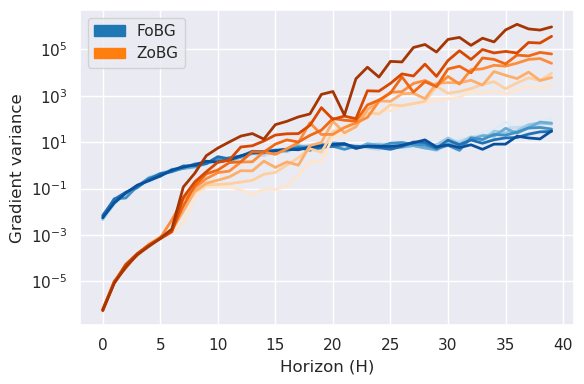

In [152]:
# what does this mean for variance
import matplotlib as mpl
import matplotlib.patches as mpatches


data = np.load("outputs/bounce_grads_40_sim_sweep.npy", allow_pickle=True)
# data = data[[0, 2, 3, 5]]
H = 40
bias = []
stiffness = []
zobgs_data = []
fobgs_data = []

for i in range(len(data)):
    print(f"{i} ke:{data[i]['soft_contact_ke']} kf:{data[i]['soft_contact_kf']}  kd:{data[i]['soft_contact_kd']}  mu:{data[i]['soft_contact_mu']}  margin:{data[i]['soft_contact_margin']} ")
    fobgs = data[i]["fobgs"]
    zobgs = data[i]["zobgs"]
    loss = data[i]["losses"]
    baseline = data[i]["baseline"]
    
    zobgs_data.append(norm_variance(zobgs))
    fobgs_data.append(norm_variance(fobgs))
    

plt.figure(figsize=(6,4))
sns.lineplot(zobgs_data, style=None, lw=2, dashes=False, palette="Blues")
sns.lineplot(fobgs_data, style=None, lw=2, dashes=False, palette="Oranges")

blue_patch = mpatches.Patch(color='tab:blue', label='FoBG')
red_patch = mpatches.Patch(color='tab:orange', label='ZoBG')
plt.legend(handles=[blue_patch, red_patch])

plt.yscale("log")
plt.ylabel("Gradient variance")
plt.xlabel("Horizon (H)")
plt.tight_layout()

plt.savefig("grad_variance.pdf")


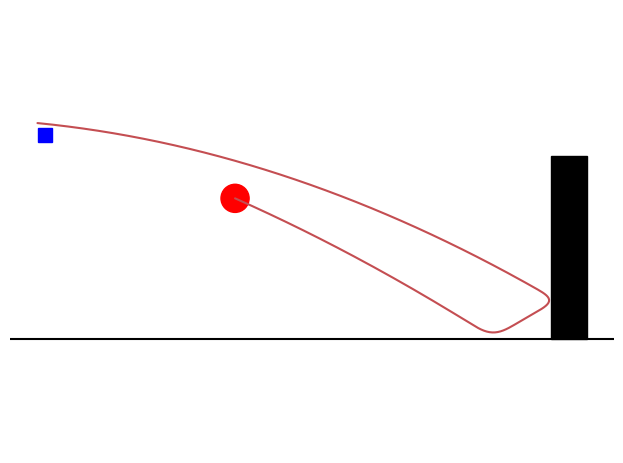

In [153]:
f, ax = plt.subplots(1, 1)#, subplot_kw={"projection": "3d"})

XX = np.linspace(0, 15, 30)
YY = np.linspace(-10, 5, 30)
X, Y = np.meshgrid(XX, YY)
data = np.load("outputs/landscapes_0.1.npy", allow_pickle=True)[0]
Z = data.pop("landscape").reshape(30,30)


# xy = data['trajectories'].mean(2)[:, :, [0,1]]
# ax.plot(xy[-1, :, 0], xy[-1, :, 1], c='g', label=)

xy = data['zero_trajectories'].mean(2)[:, :, [0,1]]
ax.plot(xy[-1, :, 0], xy[-1, :, 1], c='r')
    
# visualisations
ax.add_patch(patches.Rectangle((1.75, 0.0), 0.25, 1.3, linewidth=1, edgecolor='black', facecolor='black'))
ax.add_patch(patches.Rectangle((-1.9, 1.4), 0.1, 0.1, linewidth=1, edgecolor='blue', facecolor='blue'))
ax.add_patch(patches.Circle((-0.5, 1.0), 0.1, edgecolor='red', facecolor='red'))
ax.axhline(0, c='black')
ax.axis("equal")
ax.axis('off')
plt.tight_layout()
plt.savefig("ball_env.pdf")

## Takeaways

Increased dynamical stiffness directly correlates to increased bias!

# Optimisation
(with limited number of samples)

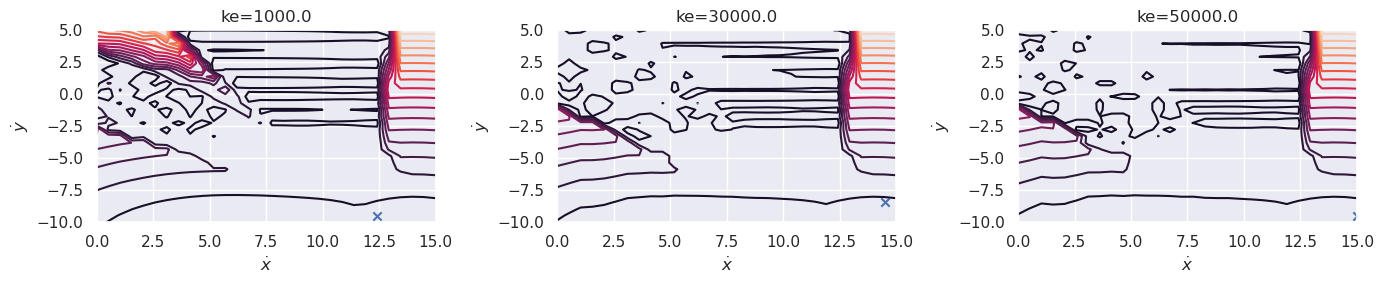

In [171]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors


f, ax = plt.subplots(1, 3, figsize=(14, 3))

XX = np.linspace(0, 15, 30)
YY = np.linspace(-10, 5, 30)
X, Y = np.meshgrid(XX, YY)

for i in range(3):
    data = np.load("outputs/landscapes_0.1.npy", allow_pickle=True)[i]
    Z = data.pop("landscape").reshape(30,30)

    ax[i].contour(X, Y, Z, levels=20)
    # surf = ax[0].plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    x_idx, y_idx = np.unravel_index(np.argmin(Z), Z.shape)
    ax[i].scatter(XX[x_idx], YY[y_idx], marker='x', label="gobal min")

    ax[i].set_xlabel(r"$\dot{x}$")
    ax[i].set_ylabel(r"$\dot{y}$")
#     ax[i].legend()
    ke = data["soft_contact_ke"]
    ax[i].set_title(f"ke={ke}")

plt.tight_layout()
plt.savefig("landscapes.pdf")

In [167]:
data.keys()

dict_keys(['landscape_trajectories', 'losses', 'trajectories', 'zero_losses', 'zero_trajectories', 'soft_contact_ke', 'soft_contact_kf', 'soft_contact_kd', 'soft_contact_mu', 'soft_contact_margin'])

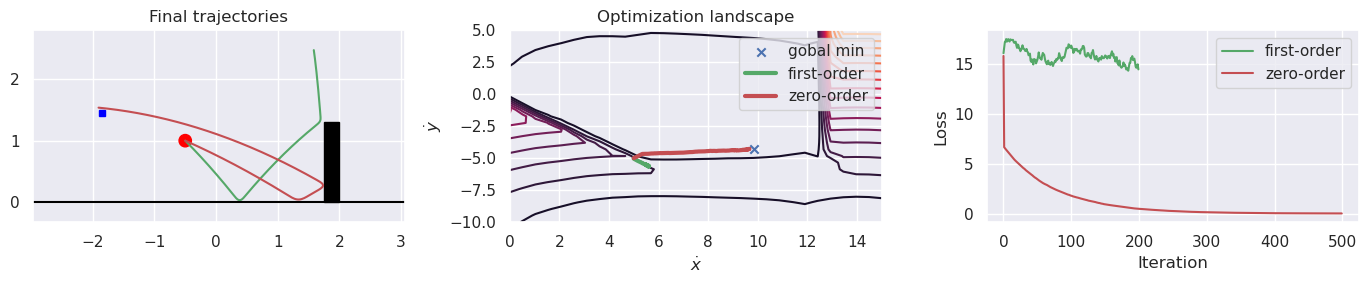

In [158]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors


f, ax = plt.subplots(1, 3, figsize=(14, 3))#, subplot_kw={"projection": "3d"})

XX = np.linspace(0, 15, 30)
YY = np.linspace(-10, 5, 30)
X, Y = np.meshgrid(XX, YY)
data = np.load("outputs/landscapes_0.1.npy", allow_pickle=True)[0]
Z = data.pop("landscape").reshape(30,30)


xy = data['trajectories'].mean(2)[:, :, [0,1]]
ax[0].plot(xy[-1, :, 0], xy[-1, :, 1], c='g')

xy = data['zero_trajectories'].mean(2)[:, :, [0,1]]
ax[0].plot(xy[-1, :, 0], xy[-1, :, 1], c='r')
    
# visualisations
ax[0].add_patch(patches.Rectangle((1.75, 0.0), 0.25, 1.3, linewidth=1, edgecolor='black', facecolor='black'))
ax[0].add_patch(patches.Rectangle((-1.9, 1.4), 0.1, 0.1, linewidth=1, edgecolor='blue', facecolor='blue'))
ax[0].add_patch(patches.Circle((-0.5, 1.0), 0.1, edgecolor='red', facecolor='red'))
ax[0].axhline(0, c='black')
ax[0].axis("equal")
ax[0].set_title("Final trajectories")


ax[1].contour(X, Y, Z, levels=20)
# surf = ax[0].plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

x_idx, y_idx = np.unravel_index(np.argmin(Z), Z.shape)
ax[1].scatter(XX[x_idx], YY[y_idx], marker='x', label="gobal min")

xy = data['trajectories'].mean(2)[:, 0, [2,3]]
ax[1].plot(xy[:, 0], xy[:, 1], c='g', linewidth=3, label="first-order")

xy = data['zero_trajectories'].mean(2)[:, 0, [2,3]]
ax[1].plot(xy[:, 0], xy[:, 1], c='r', linewidth=3, label="zero-order")

ax[1].set_xlabel(r"$\dot{x}$")
ax[1].set_ylabel(r"$\dot{y}$")
ax[1].legend()
ax[1].set_title("Optimization landscape")


losses = data['losses'].mean(-1)
ax[2].plot(losses, c='g', label=f"first-order")
z_losses = data['zero_losses'].mean(-1)
ax[2].plot(z_losses, c='r', label=f"zero-order")
ax[2].set_xlabel("Iteration")
ax[2].set_ylabel("Loss")
ax[2].legend()

plt.tight_layout()
plt.savefig("optimization.pdf")

0 final first-order 14.3166 zero-order 0.0152


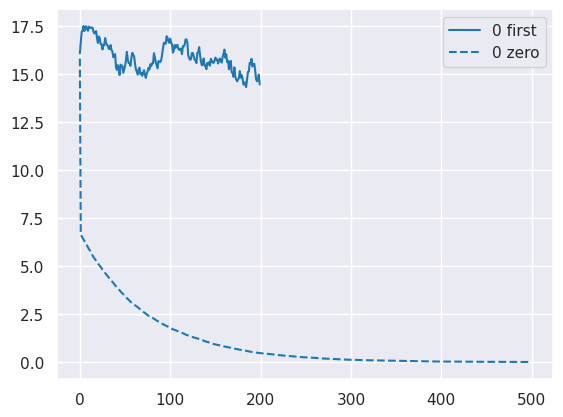

In [28]:
%matplotlib inline
import matplotlib.colors as mcolors

colors = list(mcolors.TABLEAU_COLORS.values())

data = np.load("outputs/landscapes_0.1.npy", allow_pickle=True)

for i in range(len(data[:1])):
    losses = data[i]['losses'].mean(-1)
    plt.plot(losses, c=colors[i], label=f"{i} first")
    z_losses = data[i]['zero_losses'].mean(-1)
    plt.plot(z_losses,'--', c=colors[i], label=f"{i} zero")
    print(f"{i} final first-order {losses.min():.4f} zero-order {z_losses.min():.4f}")
    
plt.legend()
# plt.ylim((-0.1, 2))

## Takeaways:

* as expected, the cost landscape becomes increasingly less convex as we make contact more stiff
* when using the short wall first-order grads seem to just circle around and don't find the solution
* regardless of stiffness or sample size if we can guarantee similar contact for all trajectories sampled around the nominal one, then first-order gradients always perform better
* if we hit the ball on the edge and we encounter stiff contact all pointing in different directions, then first-order gradients fail and bounce around while zero-order still work rather well. Unfortunately this is a very specific case

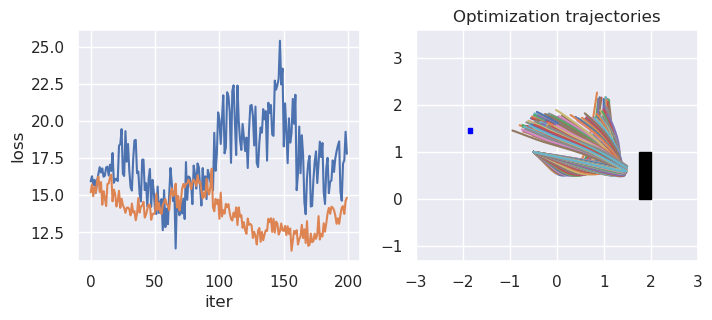

In [71]:
data = np.load("outputs/bounce_optimization_noisy.npz")

f, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].plot(data['losses'].mean(-1))
ax[0].plot(data['z_losses'].mean(-1))
ax[0].set_ylabel("loss")
ax[0].set_xlabel("iter")

for xy in data['trajectories'].mean(2):
    ax[1].plot(xy[:,0], xy[:,1])

# add wall
rect = patches.Rectangle((1.75, 0), 0.25, 1.0, linewidth=1, edgecolor='black', facecolor='black')
ax[1].add_patch(rect)

# add target
rect = patches.Rectangle((-1.9, 1.4), 0.1, 0.1, linewidth=1, edgecolor='blue', facecolor='blue')
ax[1].add_patch(rect)

ax[1].axis('equal')
ax[1].set_xlim((-3, 3))
ax[1].set_title("Optimization trajectories")
f, ax = plt.subplots(1, 2, figsize=(8, 3))
plt.savefig("stochastic_optimization.pdf")

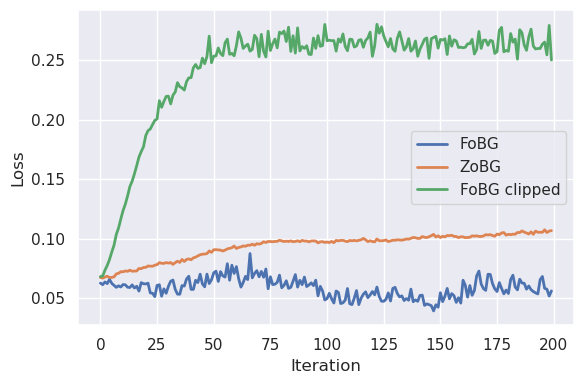

In [157]:
# plot for paper showing the effects of high variance gradients

%matplotlib inline

plt.figure(figsize=(6,4))

data = np.load("outputs/bounce_optimization_noisy.npz")
plt.plot(1/data['losses'].mean(-1), linewidth=2, label="FoBG")

data = np.load("outputs/bounce_optimization_noisy_2.npz")
plt.plot(1/data['z_losses'].mean(-1), linewidth=2, label="ZoBG")
plt.plot(1/data['losses'].mean(-1), linewidth=2, label="FoBG clipped")

plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.legend()
plt.tight_layout()

plt.savefig("high_variance_grads.pdf")

# Comparing clipped gradients

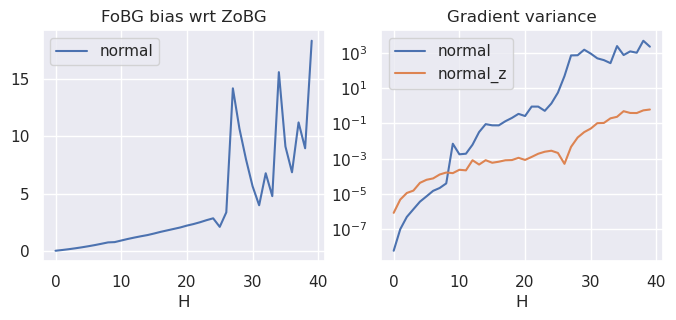

In [57]:
data = {"normal": "outputs/bounce_grads_40.npz",
#        "clip": "outputs/bounce_grads_40_clip_5.0.npz",
#        "norm": "outputs/bounce_grads_40_5.0.npz"
       }

f, ax = plt.subplots(1, 2, figsize=(8, 3))


for (k,v) in data.items():
    data = np.load(v)
    fobgs = data["fobgs"]
    zobgs = data["zobgs"]
    loss = data["losses"]
    baseline = data["baseline"]
    hh = np.arange(fobgs.shape[0])
    m=data['m']
    N = fobgs.shape[1]
    std = data['std']

    diff = zobgs.mean(axis=1) - fobgs.mean(axis=1)
    bias_l2 = norm(diff, ord=2, axis=-1)
    ax[0].plot(hh, bias_l2, label=k)
    ax[1].plot(hh, norm_variance(fobgs), label=k)
    ax[1].plot(hh, norm_variance(zobgs), label=k + "_z")
    
ax[0].set_title("FoBG bias wrt ZoBG")
ax[0].set_xlabel("H")
ax[0].legend()


ax[1].set_yscale("log")
ax[1].set_xlabel("H")
ax[1].set_title("Gradient variance")
ax[1].legend()
    
# for (start, end) in contact_ranges:
#     ax[0].axvspan(start/8, end/8, alpha=0.2, color='red')
    
# for (start, end) in contact_ranges:
#     ax[1].axvspan(start/8, end/8, alpha=0.2, color='red')
    
# ax[1].plot(hh, norm_variance(zobgs), label="ZoBGs")
# ax[1].legend()

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/bounce_grads_40_1.0.npz'

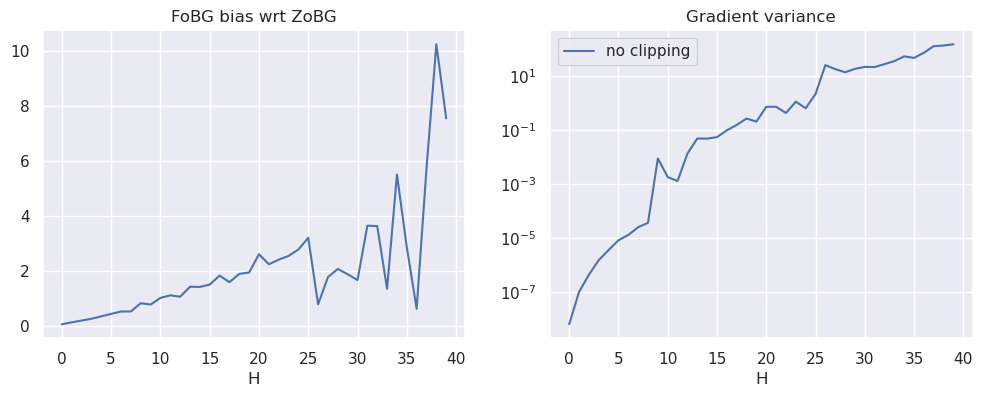

In [34]:
# comparing different clipping ranges
data = {"no clipping": "outputs/bounce_grads_40.npz",
        "1": "outputs/bounce_grads_40_1.0.npz",
       "2": "outputs/bounce_grads_40_2.0.npz",
       "3": "outputs/bounce_grads_40_3.0.npz",
       "4": "outputs/bounce_grads_40_4.0.npz",
       "5": "outputs/bounce_grads_40_5.0.npz",
       "6": "outputs/bounce_grads_40_6.0.npz"}

f, ax = plt.subplots(1, 2, figsize=(12, 4))


for (k,v) in data.items():
    data = np.load(v)
    fobgs = data["fobgs"]
    zobgs = data["zobgs"]
    loss = data["losses"]
    baseline = data["baseline"]
    hh = np.arange(fobgs.shape[0])
    m=data['m']
    N = fobgs.shape[1]
    std = data['std']

    diff = zobgs.mean(axis=1) - fobgs.mean(axis=1)
    bias_l2 = norm(diff, ord=2, axis=-1)
    ax[0].plot(hh, bias_l2, label=k)
    ax[0].set_title("FoBG bias wrt ZoBG")
    ax[0].set_xlabel("H")

    ax[1].plot(hh, norm_variance(fobgs), label=k)
    ax[1].set_yscale("log")
    ax[1].set_xlabel("H")
    ax[1].set_title("Gradient variance")
    ax[1].legend()
    
for (start, end) in contact_ranges:
    ax[0].axvspan(start/8, end/8, alpha=0.2, color='red')
    
for (start, end) in contact_ranges:
    ax[1].axvspan(start/8, end/8, alpha=0.2, color='red')
    
ax[0].legend()
ax[1].plot(hh, norm_variance(zobgs), label="ZoBGs")
ax[1].legend()

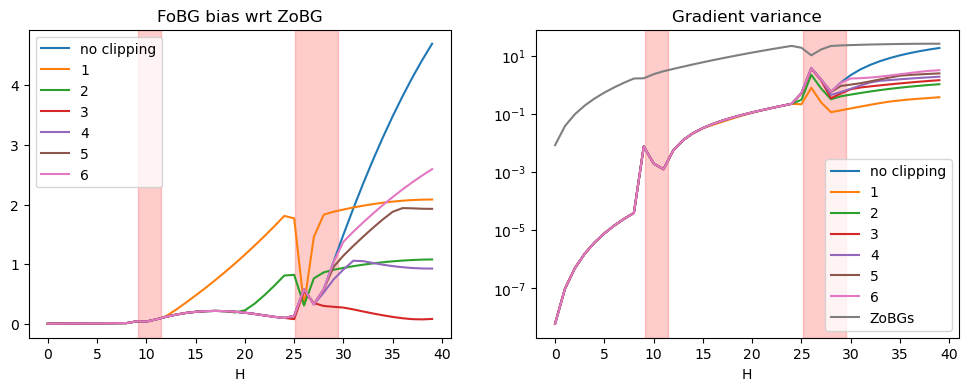

In [70]:
# comparing different clipping ranges
data = {"no clipping": "outputs/grads/bounce_grads_40.npz",
        "1": "outputs/grads/bounce_grads_40_clip_1.0.npz",
       "2": "outputs/grads/bounce_grads_40_clip_2.0.npz",
       "3": "outputs/grads/bounce_grads_40_clip_3.0.npz",
       "4": "outputs/grads/bounce_grads_40_clip_4.0.npz",
       "5": "outputs/grads/bounce_grads_40_clip_5.0.npz",
       "6": "outputs/grads/bounce_grads_40_clip_6.0.npz"}

f, ax = plt.subplots(1, 2, figsize=(12, 4))


for (k,v) in data.items():
    data = np.load(v)
    fobgs = data["fobgs"]
    zobgs = data["zobgs"]
    loss = data["losses"]
    baseline = data["baseline"]
    hh = np.arange(fobgs.shape[0])
    m=data['m']
    N = fobgs.shape[1]
    std = data['std']

    diff = zobgs.mean(axis=1) - fobgs.mean(axis=1)
    bias_l2 = norm(diff, ord=2, axis=-1)
    ax[0].plot(hh, bias_l2, label=k)
    ax[0].set_title("FoBG bias wrt ZoBG")
    ax[0].set_xlabel("H")

    ax[1].plot(hh, norm_variance(fobgs), label=k)
    ax[1].set_yscale("log")
    ax[1].set_xlabel("H")
    ax[1].set_title("Gradient variance")
    ax[1].legend()
    
for (start, end) in contact_ranges:
    ax[0].axvspan(start/8, end/8, alpha=0.2, color='red')
    
for (start, end) in contact_ranges:
    ax[1].axvspan(start/8, end/8, alpha=0.2, color='red')
    
ax[0].legend()
ax[1].plot(hh, norm_variance(zobgs), label="ZoBGs")
ax[1].legend()

In [36]:
data_files = {"first-order": "outputs/optim.npz",
       "zero-order": "outputs/optim_clip.npz",
       "normalised": "outputs/optim_norm.npz"}

for k,v in data_files.items():
    data = np.load(v)
    if k == 'zero-order':
        plt.plot(data['losses'][0], label=k)
    else:
        plt.plot(data['losses'].mean(-1), label=k)
    
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.savefig("optim_comparison.pdf")

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/optim.npz'

In [38]:
data = np.load("outpus/bounce_optimization.npz")

plt.plot(data["losses"].mean(-1), linewidth=2, label="first-order")
plt.plot(data["losses_clip"].mean(-1), linewidth=2, label="zero-order")
plt.plot(data["losses_norm"].mean(-1), linewidth=2, label="normalised")

# for k,v in data_files.items():
#     data = np.load(v)
#     plt.plot(data['losses'].mean(-1), label=k)
    
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.savefig("optim_comparison.pdf")

FileNotFoundError: [Errno 2] No such file or directory: 'outpus/bounce_optimization.npz'

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/bounce_optimization_edge.npz'

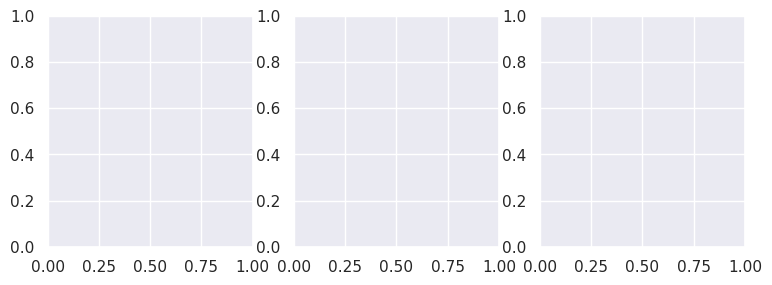

In [40]:
# effects of clipping when we're operating at the edge of contact

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors


f, ax = plt.subplots(1, 3, figsize=(9, 3))#, subplot_kw={"projection": "3d"})

data = np.load("outputs/bounce_optimization_edge.npz")

xy = data['trajectories'].mean(2)[:, :, [0,1]]
ax[0].plot(xy[-1, :, 0], xy[-1, :, 1], c='g')

xy = data['z_trajectories'].mean(2)[:, :, [0,1]]
ax[0].plot(xy[-1, :, 0], xy[-1, :, 1], c='r')

xy = data['trajectories_clip'].mean(2)[:, :, [0,1]]
ax[0].plot(xy[-1, :, 0], xy[-1, :, 1])

xy = data['trajectories_norm'].mean(2)[:, :, [0,1]]
ax[0].plot(xy[-1, :, 0], xy[-1, :, 1])
    
# visualisations
ax[0].add_patch(patches.Rectangle((1.75, 0.0), 0.25, 1.3, linewidth=1, edgecolor='black', facecolor='black'))
ax[0].add_patch(patches.Rectangle((-1.9, 1.4), 0.1, 0.1, linewidth=1, edgecolor='blue', facecolor='blue'))
ax[0].add_patch(patches.Circle((-0.5, 1.0), 0.1, edgecolor='red', facecolor='red'))
ax[0].axhline(0, c='black')
ax[0].axis("equal")
ax[0].set_title("Final trajectories")


losses = data['losses'].mean(-1)
ax[1].plot(losses, c='g', label=f"first-order")
z_losses = data['z_losses'].mean(-1)
ax[1].plot(z_losses, c='r', label=f"zero-order")
z_losses = data['losses_clip'].mean(-1)
ax[1].plot(z_losses, label=f"zero-order")
z_losses = data['losses_norm'].mean(-1)
ax[1].plot(z_losses, label=f"zero-order")
ax[1].set_xlabel("Iteration")
ax[1].legend()

ax[2].plot(data['norms'], label="first-order")
ax[2].plot(data['z_norms'], label="zero-order")

plt.tight_layout()
# plt.savefig("edge_optimizaiton_clipping.pdf")

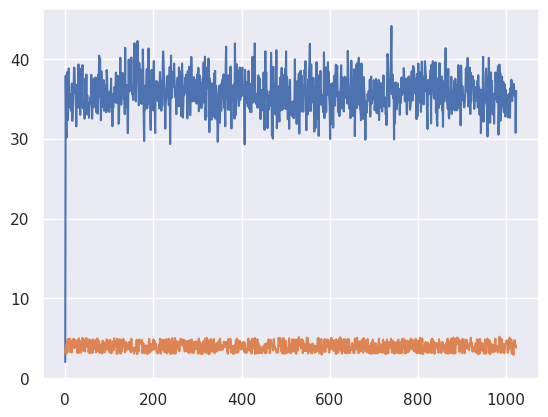

In [58]:
plt.plot(data['losses'].var(axis=0))
plt.plot(data['z_losses'].var(axis=0))

## Takeaways:

* clipping doesn't work